# Evaluation of introductory workshop "building medical apps"

In context of 3rd [EU CodeWeek](http://codeweek.eu) 2015 at [Maastricht University Medical Center](http://www.mumc.nl/en), The Netherlands. 

Programming was done in XCode 7 with the Swift 2 programming language.

Author: [Pieter Kubben, MD, PhD](http://dign.eu)

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')
# colors = plt.rcParams['axes.prop_cycle']

In [36]:
df = pd.read_excel('data/intro_med_apps.xlsx', sheetname='Data')
df.head(1)

,Profession,Sex,Age,Skills before workshop,Skills after workshop,Programming before workshop,Programming after workshop,Importance before workshop,Importance after workshop,Development without support,Development with support,Recommendation,Feedback,Unnamed: 13
0,Science,Female,31-40,1,2,2,2,2,4,2,4,Ja,Zeer interessante cursus met hulpvaardige doce...,NaN


## Descriptive statistics

In [55]:
df.describe()

,Skills before workshop,Skills after workshop,Programming before workshop,Programming after workshop,Importance before workshop,Importance after workshop,Development without support,Development with support,Unnamed: 13
count,14.000000,14.000000,14.000000,14.000000,13.000000,14.00000,14.000000,14.000000,0
mean,1.142857,2.500000,1.785714,2.714286,2.307692,3.50000,2.285714,3.285714,NaN
std,0.363137,0.518875,0.801784,0.726273,0.947331,0.85485,0.913874,0.913874,NaN
min,1.000000,2.000000,1.000000,2.000000,1.000000,2.00000,1.000000,2.000000,NaN
25%,1.000000,2.000000,1.000000,2.000000,2.000000,3.00000,2.000000,3.000000,NaN
50%,1.000000,2.500000,2.000000,3.000000,2.000000,3.00000,2.000000,3.000000,NaN
75%,1.000000,3.000000,2.000000,3.000000,3.000000,4.00000,3.000000,4.000000,NaN
max,2.000000,3.000000,3.000000,4.000000,4.000000,5.00000,4.000000,5.000000,NaN


## Demographics of participants

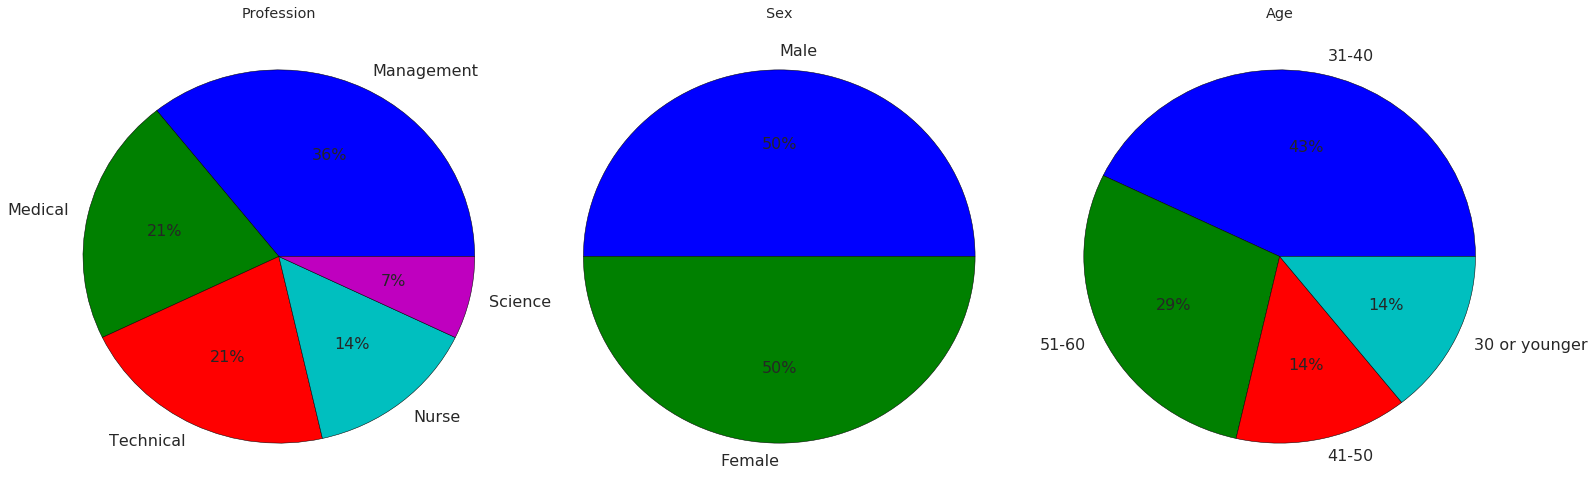

In [263]:
df_demographics = df.iloc[:,0:3]
titles = list(df_demographics)

fig, axes = plt.subplots(1, len(titles))
fig_heigth = 7
fig_width = fig_heigth * len(titles)

for i, title in enumerate(titles):
    pie = df[title].value_counts().plot(kind='pie', figsize=(fig_width, fig_heigth), ax=axes[i], title=title, 
        fontsize=16, autopct='%1.0f%%')
    pie.set_ylabel('')
    
plt.tight_layout()

# plt.savefig('fig_demographics.png', dpi=300, bbox_inches='tight')

## Pre-post workshop comparisons

In [220]:
df_comparisons = df.iloc[:,3:11]
pd.DataFrame({'Mean': df_comparisons.mean(),
              'Mean variance': df_comparisons.var(),
              'Median': df_comparisons.median(),
              'Median IQR': df_comparisons.quantile(.75) - df_comparisons.quantile(.25)})

,Mean,Mean variance,Median,Median IQR
Skills before workshop,1.142857,0.131868,1.0,0
Skills after workshop,2.500000,0.269231,2.5,1
Programming before workshop,1.785714,0.642857,2.0,1
Programming after workshop,2.714286,0.527473,3.0,1
Importance before workshop,2.307692,0.897436,2.0,1
Importance after workshop,3.500000,0.730769,3.0,1
Development without support,2.285714,0.835165,2.0,1
Development with support,3.285714,0.835165,3.0,1


### Boxplots of pre-post comparisons

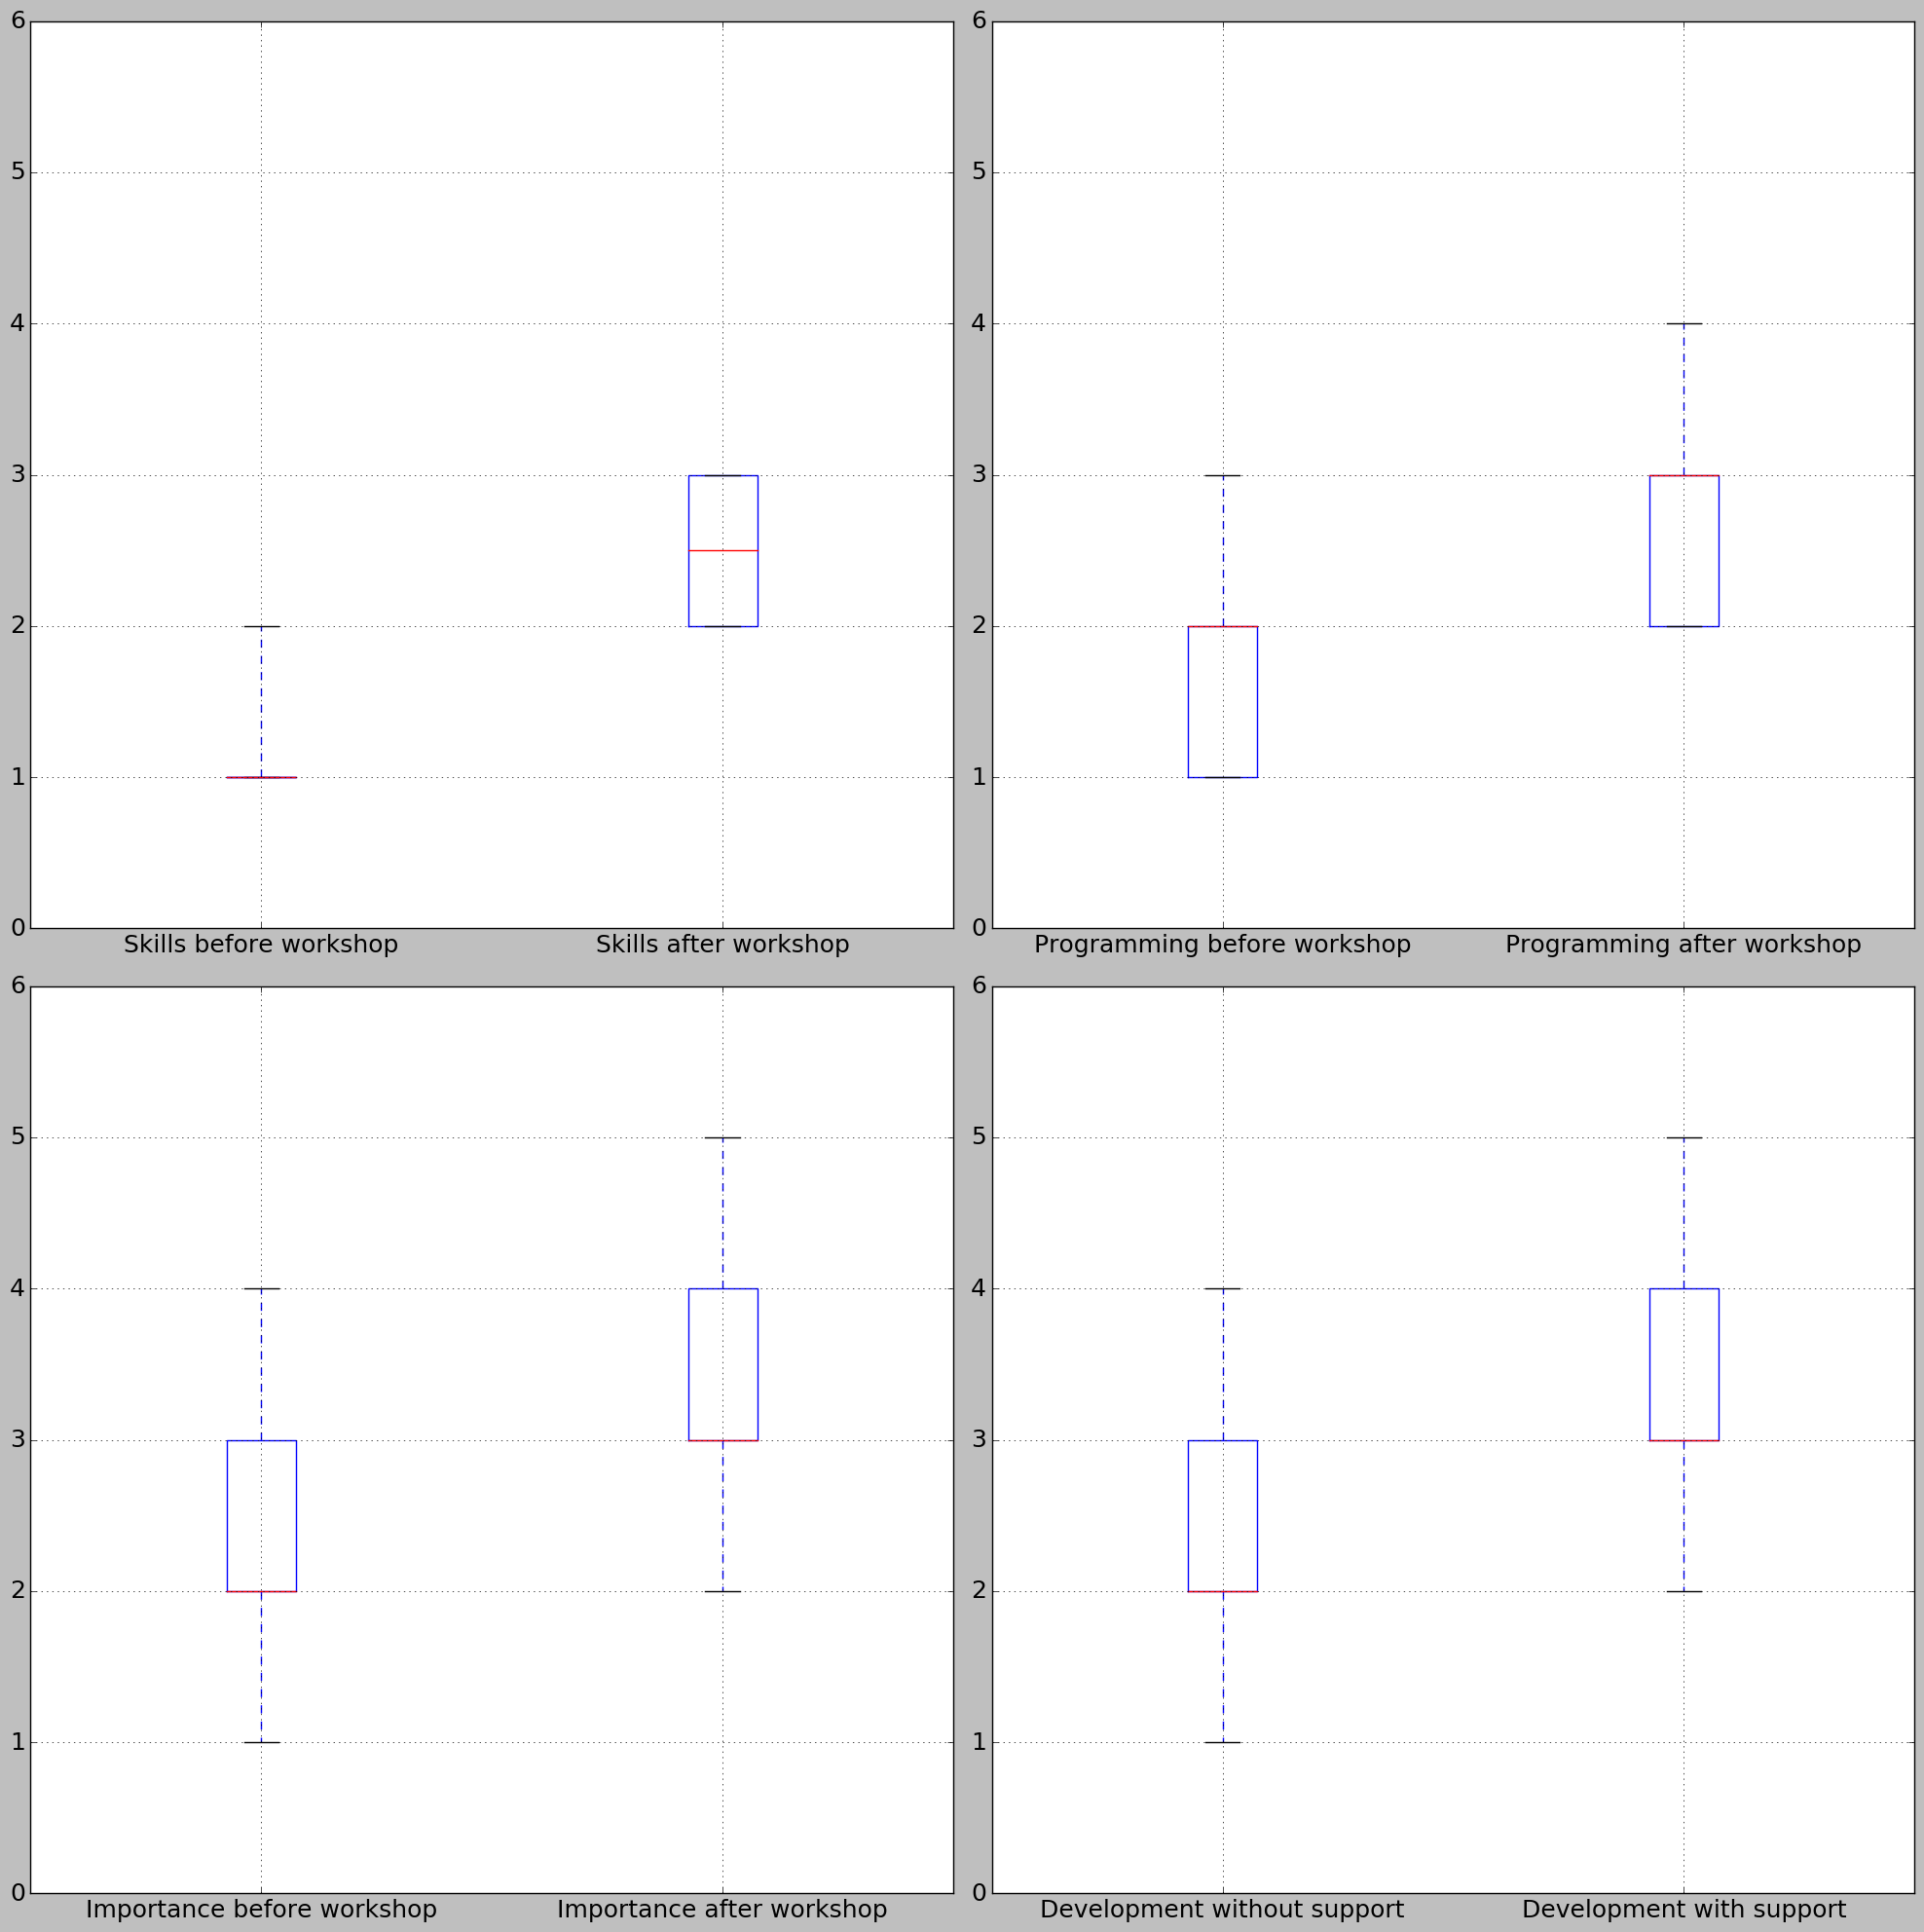

In [223]:
fig, axes = plt.subplots(2,2)
titles = list(df_comparisons)
i = 0

while i < len(titles):
    df_comparisons[[titles[i], titles[i+1]]].plot(kind='box', figsize=(20,20), ylim=(0,6), ax=axes[i/4,i%4/2],
            fontsize = 18, grid=True)
    i += 2
plt.tight_layout()

# plt.savefig('fig_comparisons.png', dpi=300)